1. Data Cleaning
2. Visualizing Energy Usage
3. ARIMA Model Forecasting
4. Time Series Prediction with Recurrent Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv("HomeC.csv")
dataset.info()

C:\Users\Uros\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
time                   503911 non-null object
use [kW]               503910 non-null float64
gen [kW]               503910 non-null float64
House overall [kW]     503910 non-null float64
Dishwasher [kW]        503910 non-null float64
Furnace 1 [kW]         503910 non-null float64
Furnace 2 [kW]         503910 non-null float64
Home office [kW]       503910 non-null float64
Fridge [kW]            503910 non-null float64
Wine cellar [kW]       503910 non-null float64
Garage door [kW]       503910 non-null float64
Kitchen 12 [kW]        503910 non-null float64
Kitchen 14 [kW]        503910 non-null float64
Kitchen 38 [kW]        503910 non-null float64
Barn [kW]              503910 non-null float64
Well [kW]              503910 non-null float64
Microwave [kW]         503910 non-null float64
Living room [kW]       503910 non-null float64
Solar [kW]             503910 non-null float

In [4]:
dataset.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [5]:
dataset.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503910,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset = dataset[0:-1]
dataset.tail()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
503905,1452128305,1.601233,0.003183,1.601233,0.000050,0.085267,0.642417,0.041783,0.005267,0.008667,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [7]:
dataset.columns = [col.replace(" [kW]", "") for col in dataset.columns]
dataset.columns

Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [8]:
#Unifying separate columns for single rooms

dataset['sum_Furnace'] = dataset[['Furnace 1','Furnace 2']].sum(axis=1)
dataset['avg_Kitchen'] = dataset[['Kitchen 12','Kitchen 14', 'Kitchen 38']].mean(axis=1)
dataset.head()

,time,use,gen,House overall,Dishwasher,Furnace 1,Furnace 2,Home office,Fridge,Wine cellar,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000189
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000189
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000206
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000217
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000261


In [9]:
dataset = dataset.drop(['Kitchen 12','Kitchen 14', 'Kitchen 38'], axis=1)
dataset = dataset.drop(['Furnace 1','Furnace 2'], axis=1)
dataset.head()

,time,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000189
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000189
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000206
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000217
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000261


In [10]:
#Convert Unix Time to Human Readable Format

import time
time_index = pd.date_range("2016-01-01 05:00", periods=len(dataset), freq="min")
time_index = pd.DatetimeIndex(time_index)
dataset = dataset.set_index(time_index)
dataset = dataset.drop (["time"], axis=1)
dataset.head()

,use,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000189
2016-01-01 05:01:00,0.934333,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000189
2016-01-01 05:02:00,0.931817,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000206
2016-01-01 05:03:00,1.022050,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000217
2016-01-01 05:04:00,1.139400,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000261


In [11]:
#'Use' and 'House overall' columns are identical, so we are going to remove the first one

dataset = dataset.drop(['use'], axis=1)
dataset.head()

,gen,House overall,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,sum_Furnace,avg_Kitchen
2016-01-01 05:00:00,0.003483,0.932833,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.082617,0.000189
2016-01-01 05:01:00,0.003467,0.934333,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.084533,0.000189
2016-01-01 05:02:00,0.003467,0.931817,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.083017,0.000206
2016-01-01 05:03:00,0.003483,1.022050,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.175417,0.000217
2016-01-01 05:04:00,0.003467,1.139400,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0,0.300917,0.000261


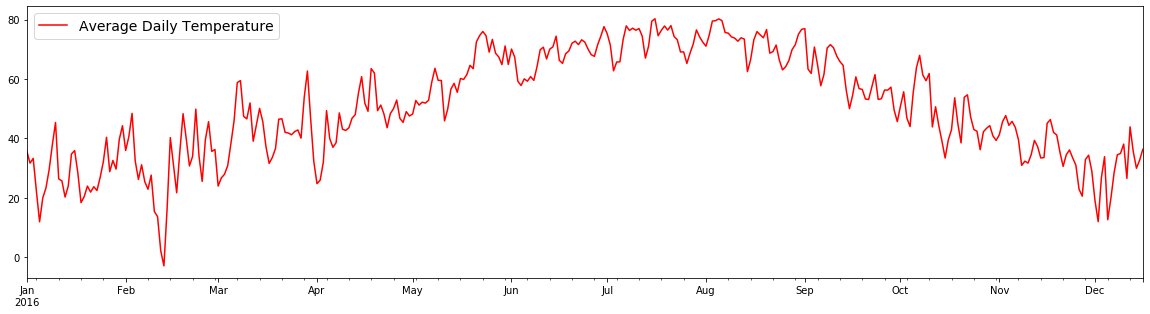

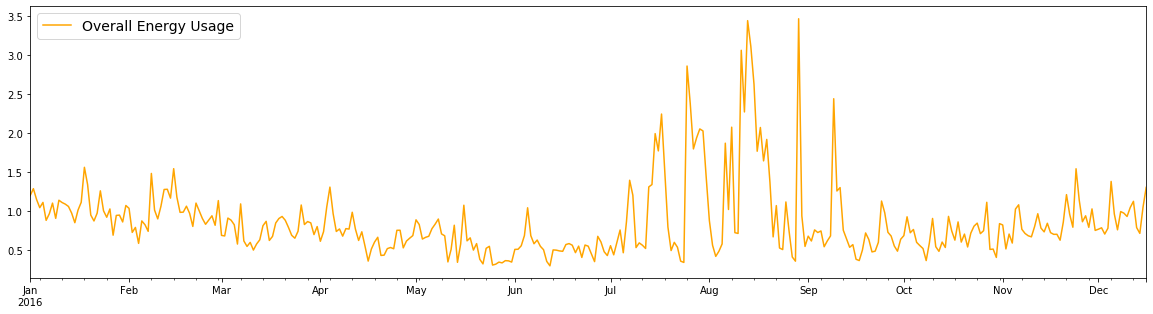

In [12]:
#Visualizing some of the variables on a monthly basis


dataset['temperature'].resample(rule='D').mean().plot(figsize=(20, 5), c="red", label='Average Daily Temperature')
plt.legend(loc="upper left", prop={'size': 14})
plt.show()
dataset['House overall'].resample(rule='D').mean().plot(figsize=(20, 5), c="orange", label='Overall Energy Usage')
plt.legend(loc="upper left", prop={'size': 14})
plt.show()

Energy usage and temperature seem to be somewhat correlated - we can observe that highest temperatures (July through September) correspond with the highest peaks in energy usage. 

In [13]:
#Checking the biggest spenders

average_consumption = {'Dishwasher' : (dataset['Dishwasher']).mean(),
                      'Home office' : (dataset['Home office']).mean(),
                      'Fridge' : (dataset['Fridge']).mean(),
                      'Wine cellar' : (dataset['Wine cellar']).mean(),
                      'Barn' : (dataset['Barn']).mean(),
                      'Well' : (dataset['Well']).mean(),
                      'Microwave' : (dataset['Microwave']).mean(),
                      'Living room' : (dataset['Living room']).mean()}

spenders_descending = sorted(average_consumption.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(spenders_descending, columns = ['Sensor', 'Consumption'])
df

,Sensor,Consumption
0,Home office,0.081287
1,Fridge,0.063556
2,Barn,0.058530
3,Wine cellar,0.042137
4,Living room,0.035313
5,Dishwasher,0.031368
6,Well,0.015642
7,Microwave,0.010983


Considering higher energy usage in the summer, it makes sense that 'Fridge' is the second highest spender when it comes to energy consumption. We don't exactly know what is measured inside 'Home office', but we can maybe conclude based on the energy usage pattern it is some kind of an Air Conditioning device. Let's try plotting both 'Fridge' and 'Home office' on the same graph to observe potential relationships.

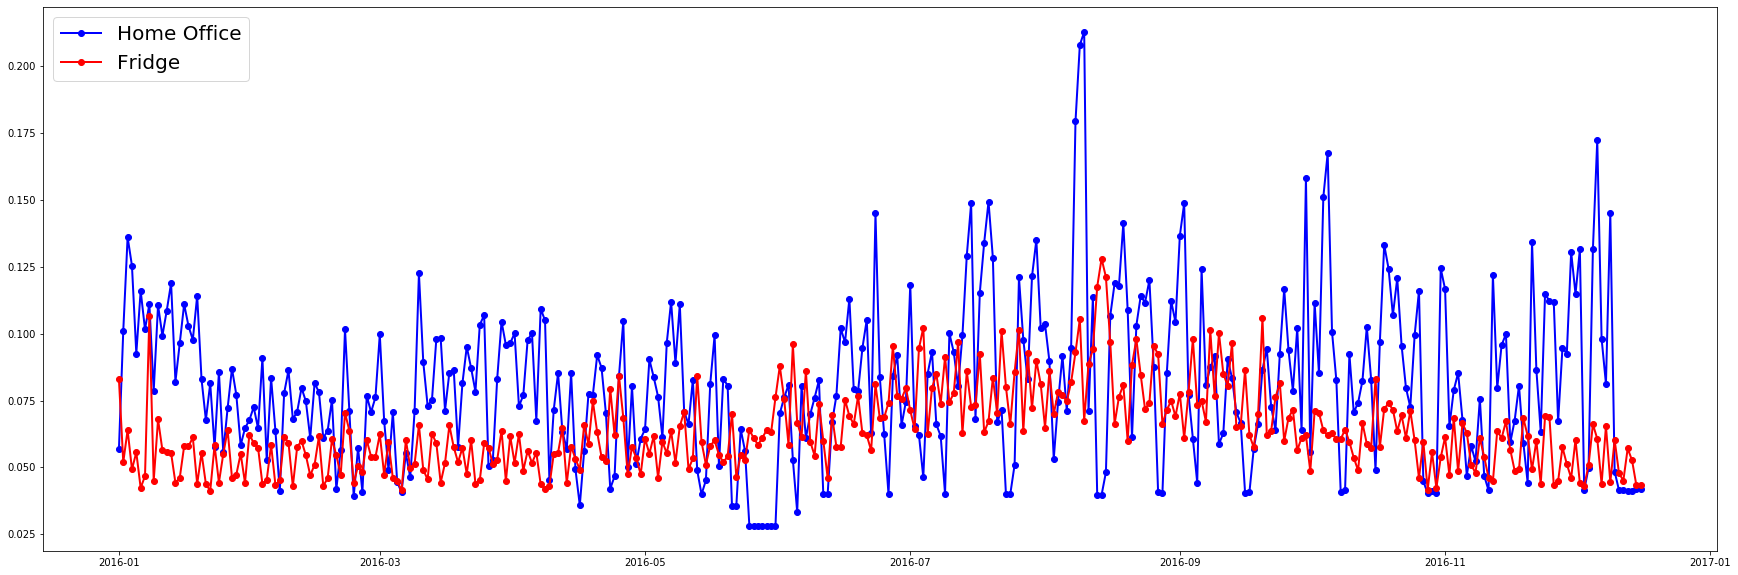

In [14]:
plt.figure(figsize=(30,10))
plt.plot(dataset['Home office'].resample(rule='D').mean(), c="blue", label='Home Office', linewidth=2, marker ='o')
plt.plot(dataset['Fridge'].resample(rule='D').mean(), c="red", label='Fridge', linewidth=2, marker = 'o')

plt.legend(loc="upper left", prop={'size': 20})
plt.show()

As expected, there seems to be a slight increase in usage in both during the summer months, with 'Home office' having the highest peak in usage, as well as being a much bigger spender overall. 

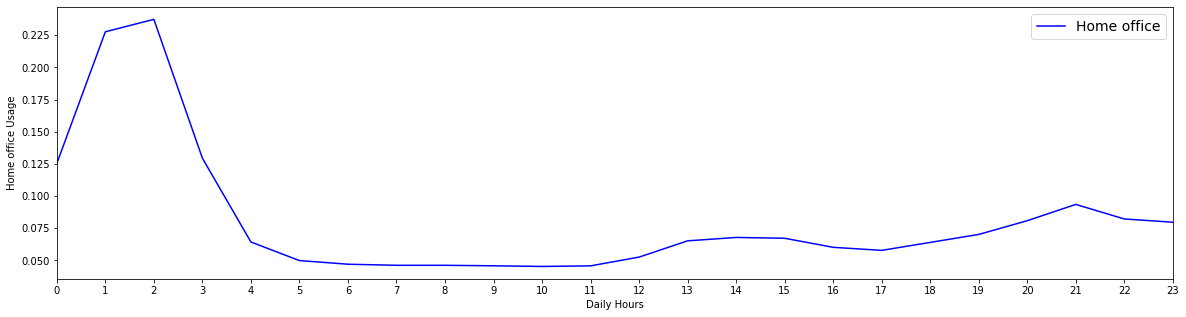

In [15]:
plt.figure(figsize=(20,5))
dataset.groupby(dataset.index.hour).mean()['Home office'].plot(xticks=np.arange(24), c='blue').set(xlabel='Daily Hours', ylabel='Home office Usage') 
plt.legend(loc="upper right", prop={'size': 14})
plt.show()

There seems to be a weird spike in usage during the night, but unfortunately we don't have more detailed information about what exactly this sensor is measuring, so we can't explore this any further.

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band, which gives us an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

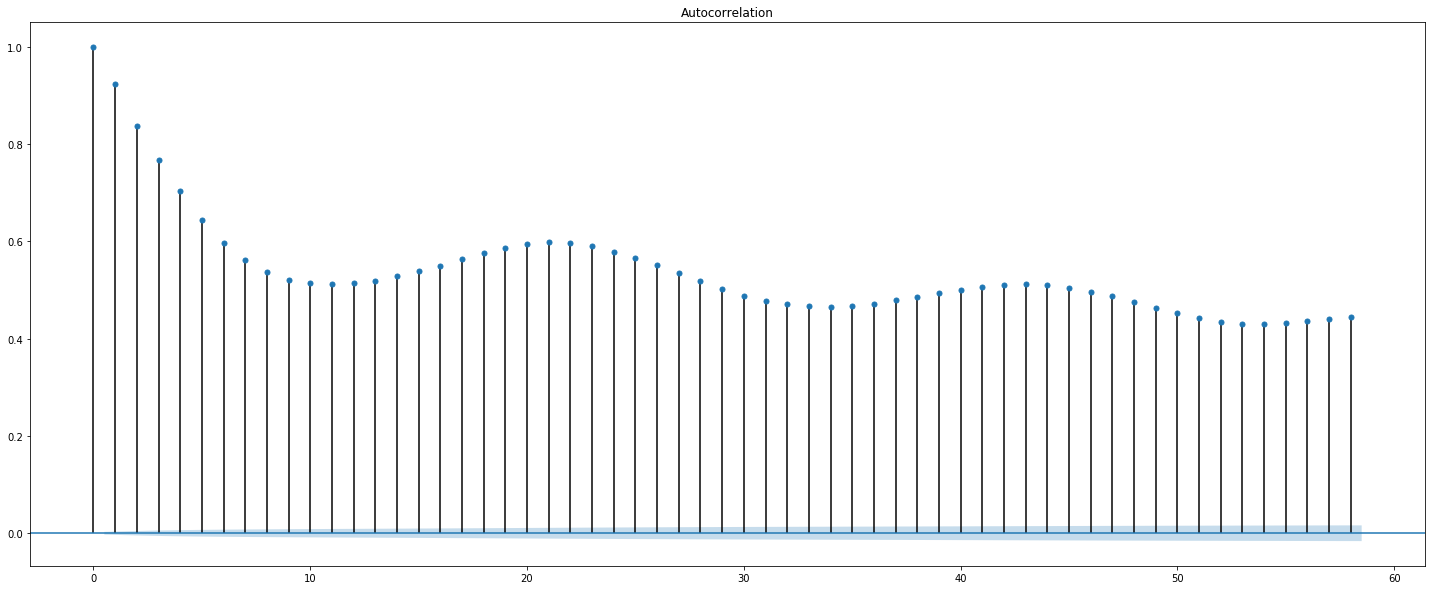

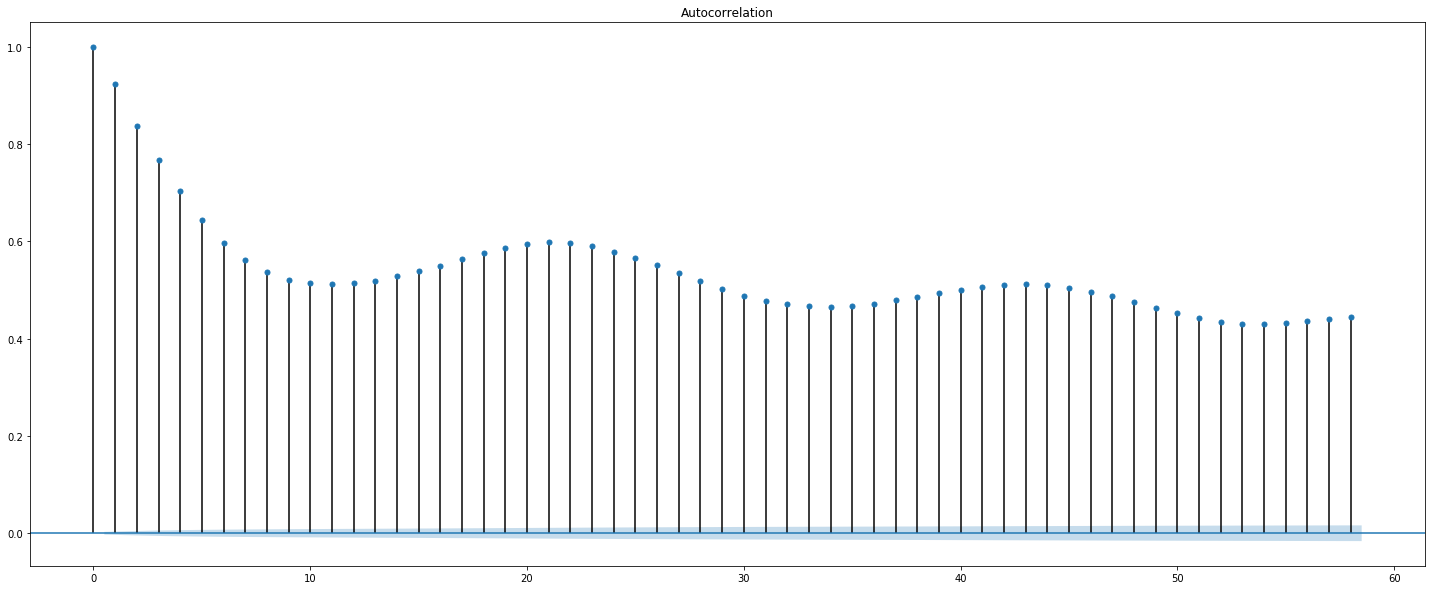

In [17]:
plt.rcParams["figure.figsize"] = (25,10)
plot_acf(dataset['House overall']) 

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.

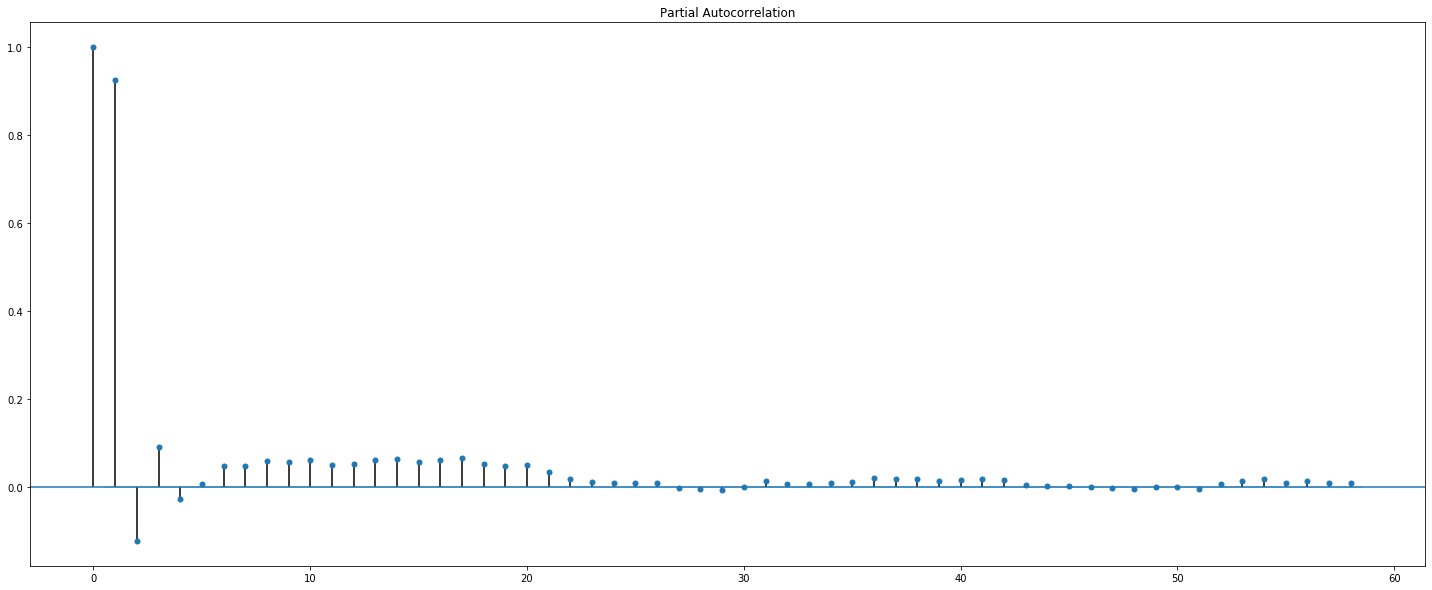

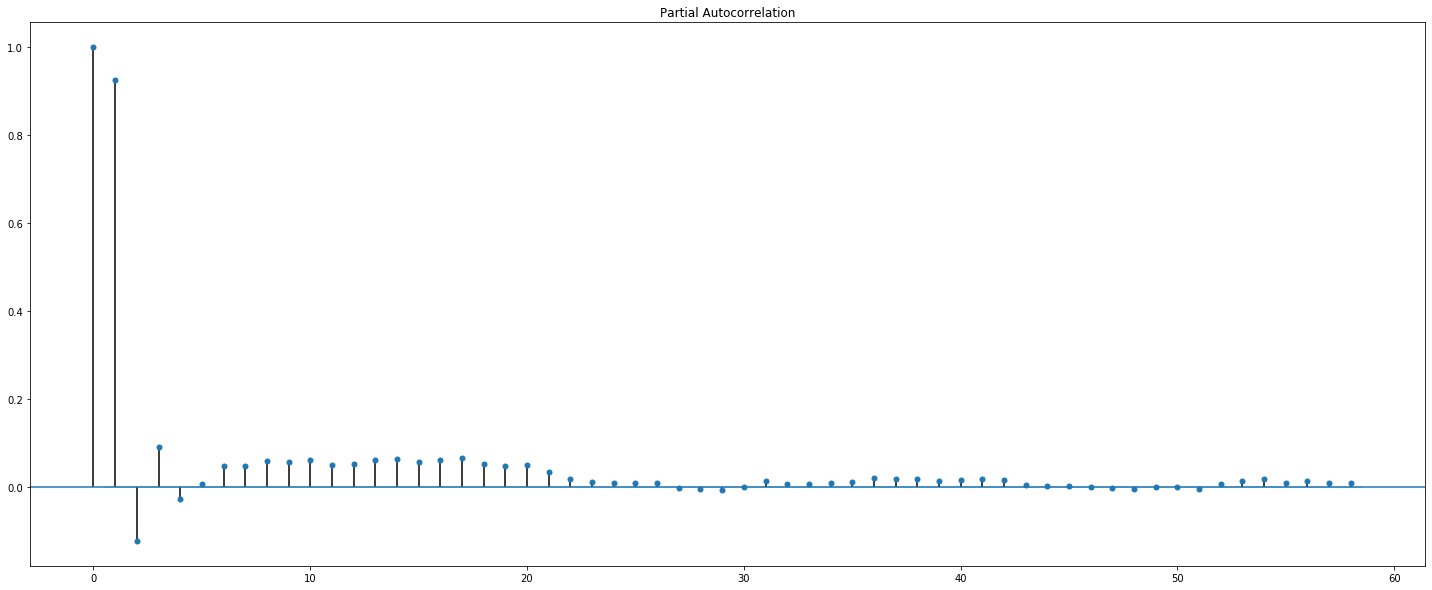

In [18]:
plt.rcParams["figure.figsize"] = (25,10)
plot_pacf(dataset['House overall'])

In [19]:
energy_data = dataset['House overall']
energy_data.size, type(energy_data)

(503910, pandas.core.series.Series)

In [20]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def forecast_ts(data, tt_ratio):
    X = data.to_numpy() #Converting data to numpy array
    size = int(len(X) * tt_ratio)
    train, test = X[0:size], X[size:len(X)] #Splitting data into train/test sets
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order = (5, 1, 0)) #p = 5, d = 1, q = 0
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('progress:%',round(100*(t/len(test))),'\t predicted=%f, expected=%f' % (yhat, obs), end="\r")
    error = mean_squared_error(test, predictions)
    print('\n Test MSE: %.3f' % error)
    
    plt.rcParams["figure.figsize"] = (25,10)
    preds = np.append(train, predictions)
    plt.plot(list(preds), color='green', linewidth=3, label="Predicted Data")
    plt.plot(list(data), color='blue', linewidth=2, label="Original Data")
    plt.axvline(x=int(len(data)*tt_ratio)-1, linewidth=5, color='red')
    plt.legend()
    plt.show()

progress:% 99 	 predicted=0.957226, expected=1.302108 88 	 predicted=0.750196, expected=0.779210 90 	 predicted=1.119908, expected=0.961238 91 	 predicted=0.983452, expected=0.758562
 Test MSE: 0.076


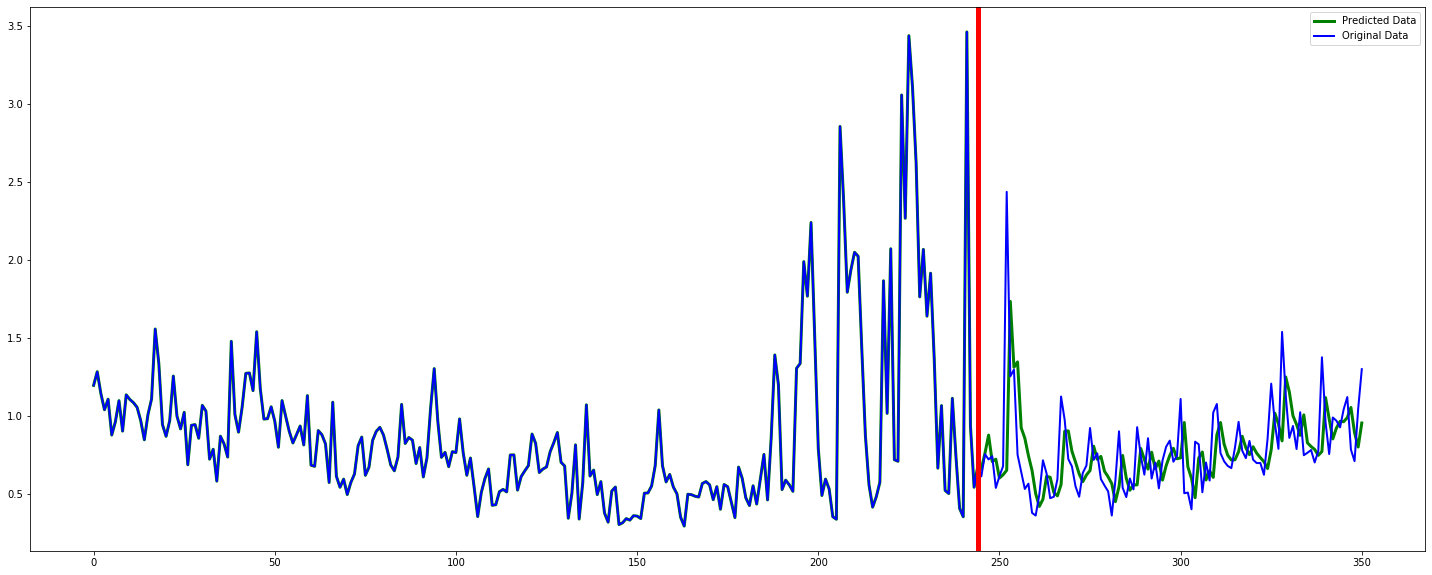

In [21]:
data = energy_data.resample('d').mean()
data.shape
tt_ratio = 0.70 # Train to Test ratio
forecast_ts(data, tt_ratio)

ARIMA Model gives a pretty good estimate when predicting energy consumption. Now let's try building a neural network model.

In [22]:
#Time Series Prediction with Reccurent Neural Networks

from sklearn.model_selection import TimeSeriesSplit

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=5) #time-series cross validation on a rolling basis
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


The idea is rather simple -- we train our model on a small segment of the time series from the beginning until some  t , make predictions for the next  t+n  steps, and calculate an error. Then, we expand our training sample to  t+n  value, make predictions from  t+n  until  t+2∗n , and continue moving our test segment of the time series until we hit the last available observation. As a result, we have as many folds as  n  will fit between the initial training sample and the last observation.

We are going to use weather information and yesterdays energy usage as our features to try and predict consumption for the current day.

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

Using TensorFlow backend.


In [36]:
#Aggregating data into hourly values to make it easier to analyze (Original dataset had an input for each minute - 
#by resampling it on hour-to-hour basis, we reduce our number of features from ~50.000 to ~8.000)

dataset = dataset.resample('H').mean()
print("Shape of hourly dataset: {} --> n_rows = {}, n_cols = {}".format(dataset.shape, dataset.shape[0],dataset.shape[1]))

Shape of hourly dataset: (8399, 24) --> n_rows = 8399, n_cols = 24


In [37]:
#Feature engineering - we are going to use weather data and yesterdays energy usage to try and predict energy usage for current day

weather_features = dataset[['temperature', 'humidity', 'visibility', 'windSpeed', 'pressure', 'windBearing', 'precipIntensity', 'precipProbability']]
energy_use = dataset['House overall']
weather_features = weather_features['2016-01-02 05:00:00':'2016-12-02 05:00:00']
weather_features['yesterday_use'] = energy_use['2016-01-01 05:00:00':'2016-12-01 05:00:00'].values
energy_use = dataset['House overall']['2016-01-02 05:00:00':'2016-12-02 05:00:00']
weather_features.shape, energy_use.shape

((8041, 9), (8041,))

In [26]:
#Splitting data into train and test sets

x_train = weather_features[:5000]
y_train = energy_use[:5000]

x_test = weather_features[5000:]
y_test = energy_use[5000:]

x_train = np.reshape(x_train.values, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test.values, (x_test.shape[0], x_test.shape[1], 1))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5000, 9, 1), (5000,), (3041, 9, 1), (3041,))

In [38]:
#Model Building

model = Sequential()
model.add(LSTM(units=128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(units=64))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 9, 128)            66560     
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Model Training

lstm = model.fit(x_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
5000/5000 [==============================] - 3s 634us/step - loss: 0.4561
Epoch 2/15
5000/5000 [==============================] - 2s 454us/step - loss: 0.3852
Epoch 3/15
5000/5000 [==============================] - 2s 468us/step - loss: 0.3676
Epoch 4/15
5000/5000 [==============================] - 2s 474us/step - loss: 0.3650
Epoch 5/15
5000/5000 [==============================] - 3s 503us/step - loss: 0.3682
Epoch 6/15
5000/5000 [==============================] - 2s 500us/step - loss: 0.3642
Epoch 7/15
5000/5000 [==============================] - 2s 470us/step - loss: 0.3641
Epoch 8/15
5000/5000 [==============================] - 2s 482us/step - loss: 0.3594
Epoch 9/15
5000/5000 [==============================] - 2s 467us/step - loss: 0.3635
Epoch 10/15
5000/5000 [==============================] - 2s 485us/step - loss: 0.3629
Epoch 11/15
5000/5000 [==============================] - 2s 456us/step - loss: 0.3614
Epoch 12/15
5000/5000 [==============================] - 2s 488

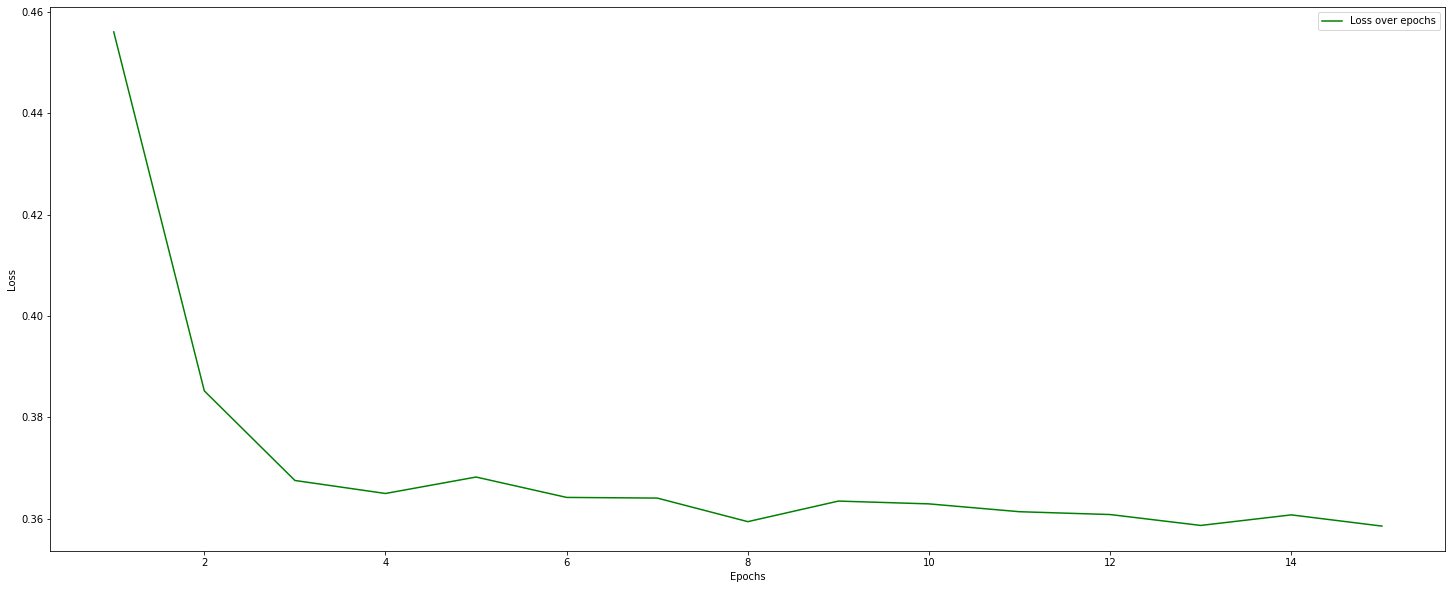

In [40]:
#Evaluating loss function

loss_train = np.asarray(lstm.history['loss'])
epochs = np.asarray(range(1,16))
plt.plot(epochs, loss_train, 'g', label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

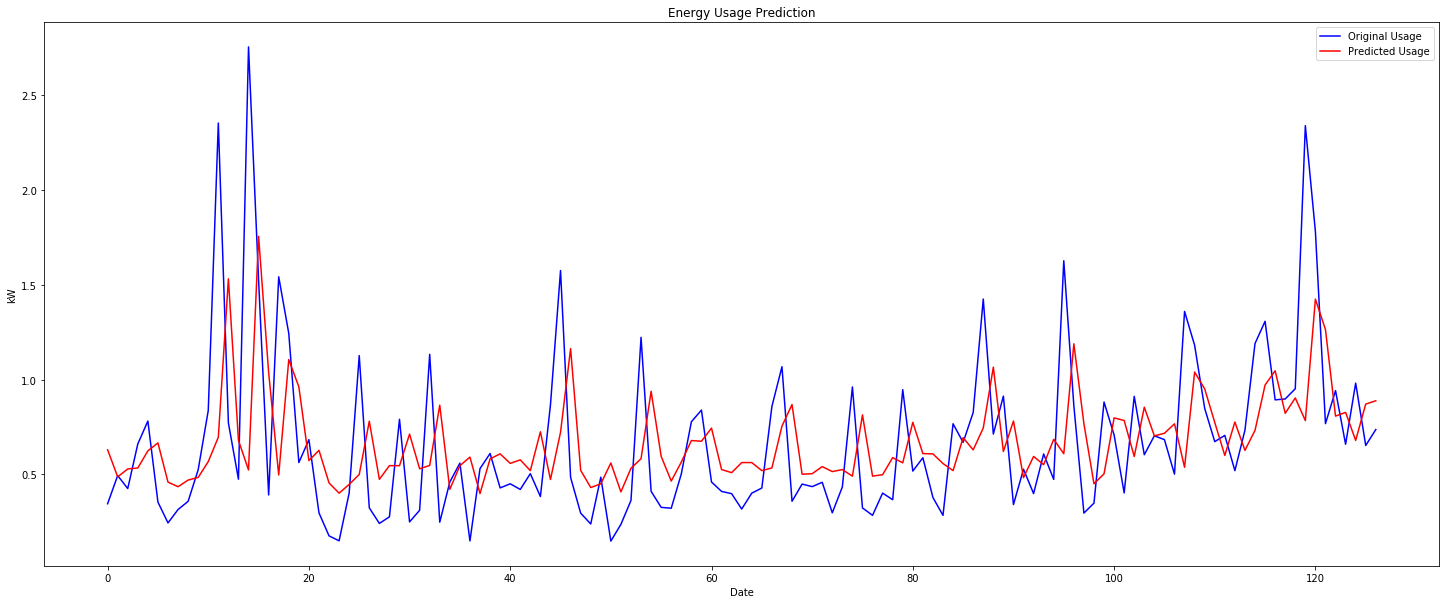

In [41]:
#Visualizing the performance of neural network. Plotting actual values versus model predictions

predictions = model.predict(x_test)
plt.figure(figsize=(25,10))
plt.plot(y_test.values[::24], color='blue', label='Original Usage')
plt.plot(predictions[:,0][::24] , color='red', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.xlabel('Date')
plt.ylabel('kW')
plt.legend()
plt.show()